# Introduction

Based on an analysis of approximately 450 observations, can we ascertain the predictability of the frequency of depression occurrences in individuals, given a set of specific parameters?

# Statement of Purpose

This machine learning model has been developed to forecast an individual's mental well-being by analyzing a range of pertinent factors, including their choice of digital platforms, occupational engagement, and interpersonal relationships, among others. The primary objective of this model is to proactively identify and mitigate stressors, thereby enhancing overall life satisfaction and resilience in the face of unforeseen adversities.

# Standard Imports

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [306]:
csv = 'https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Science/Social%20Mental%20Health%20Decision%20Tree/smmh.csv'
df = pd.read_csv(csv)
df

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


# Rename Columns
In order to aid with the machine learning process I am going to rename the columns but I will keep the previous output above so you can review previous column names. Format remains similar to the author of the study https://github.com/Daerkns

In [307]:
df = df.rename(columns={
    '1. What is your age?':'Age',
    '2. Gender':'Sex',
    '3. Relationship Status':'Relationship Status',
    '4. Occupation Status':'Occupation',
    '5. What type of organizations are you affiliated with?':'Affiliations',
    '6. Do you use social media?':'Social Media User?',
    '7. What social media platforms do you commonly use?':'Platforms Used',
    '8. What is the average time you spend on social media every day?':'Time Spent',
    '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
    '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
    "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
    '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
    '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
    '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
    '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
    '18. How often do you feel depressed or down?':'Depression Q1',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3'
})

titles = list(df.columns)
titles[11], titles[12] = titles[12], titles[11]
titles[12], titles[14] = titles[14], titles[12]
titles[13], titles[14] = titles[14], titles[13]
data = df[titles]
df.head()

,Timestamp,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Q1,...,Anxiety Q1,ADHD Q3,Anxiety Q2,ADHD Q4,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


# Data Wrangling
Features trees don't require feature scaling so we won't be using sklearn's standard scaler. Instead, we will focus on cleaning data and feature engineering.

In [308]:
# Mass drop na rows
df.dropna(axis=0)

df = df.drop('Affiliations', axis=1)# Add back later but it is cursed now

# Drop timestamp row as it is not needed for the model
df = df.drop('Timestamp', axis=1)

# Gender we have to encode into integers for class decisions
gender_mapping = {
    'NB': 0,
    'Nonbinary ': 0,
    'Male': 1,
    'unsure ': 0,  
    'Non binary ': 0,  
    'Female': 2, 
    'Trans': 0,  
    'Non-binary': 0,
    'There are others???': 0 
}

# Replace values in the 'Gender' column using the mapping
df['Sex'] = df['Sex'].replace(gender_mapping)

# Convert age from float64 to int
df['Age'] = df['Age'].astype('int')

# Convert relationship status to binary (because this is a small training set I choose to condense divorced into single and in a married into in a relationship)
relationship_mapping = {
    'In a relationship': 1,
    'Single': 0,
    'Married': 1,
    'Divorced': 0
}


df['Relationship Status'] = df['Relationship Status'].replace(relationship_mapping)

# Convert social media into binary
df['Social Media User?'] = df['Social Media User?'].replace({'Yes':1,'No':0})

# Convert Time Spent to an integer
time_spent_mapping = {
    'Less than an Hour': 0,
    'Between 1 and 2 hours': 1,
    'Between 2 and 3 hours': 2,
    'Between 3 and 4 hours': 3,
    'Between 4 and 5 hours': 4,
    'More than 5 hours': 5
}

df['Time Spent'] = df['Time Spent'].replace(time_spent_mapping)

# Reassign Self Esteem #2 according to the values of the study
df.loc[df['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 0
df.loc[df['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 0
df.loc[df['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 0
df.loc[df['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 4
df.loc[df['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 2

In [309]:
df

,Age,Sex,Relationship Status,Occupation,Social Media User?,Platforms Used,Time Spent,ADHD Q1,ADHD Q2,Anxiety Q1,ADHD Q3,Anxiety Q2,ADHD Q4,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
0,21,1,1,University Student,1,"Facebook, Twitter, Instagram, YouTube, Discord...",2,5,3,2,5,2,5,2,0,2,5,4,5
1,21,2,0,University Student,1,"Facebook, Twitter, Instagram, YouTube, Discord...",5,4,3,2,4,5,4,5,4,1,5,4,5
2,21,2,0,University Student,1,"Facebook, Instagram, YouTube, Pinterest",3,3,2,1,2,5,4,3,0,1,4,2,5
3,21,2,0,University Student,1,"Facebook, Instagram",5,4,2,1,3,5,3,5,4,2,4,3,2
4,21,2,0,University Student,1,"Facebook, Instagram, YouTube",2,3,5,4,4,5,5,3,0,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24,1,0,Salaried Worker,1,"Facebook, Instagram, YouTube",2,3,4,3,4,3,4,4,2,4,3,4,4
477,26,2,1,Salaried Worker,1,"Facebook, YouTube",1,2,1,2,3,4,4,4,2,4,4,4,1
478,29,2,1,Salaried Worker,1,"Facebook, YouTube",2,3,3,4,3,2,3,3,0,4,2,2,2
479,21,1,0,University Student,1,"Facebook, Twitter, Instagram, YouTube, Discord...",2,2,3,2,3,3,2,2,0,4,4,5,4


# Feature Engineering

In [310]:
# One-hot encode occupation
df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)

# Tokenization of platforms used (similar to one-hot encoding), I may decide to use count vectorization or TF-IDF here in the future to shorten features
df['Platforms Used'] = df['Platforms Used'].str.lower().str.replace('[^a-z\s,]', '', regex=True)
df['Platforms Used'] = df['Platforms Used'].str.split(',')
platforms_tokenized = df['Platforms Used'].str.join(',').str.get_dummies(',')

# Drop platforms used and append platforms tokenized to the end
df = df.drop(columns=['Platforms Used'], axis=1)
df = pd.concat([df, platforms_tokenized], axis=1)

# Create a mental health index from the questions (indicated by the Q)
scores = pd.DataFrame()

adhd_questions = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
scores['ADHD Score'] = df[adhd_questions].sum(axis=1)

anxiety_questions = ['Anxiety Q1', 'Anxiety Q2']
scores['Anxiety Score'] = df[anxiety_questions].sum(axis=1)

self_esteem_questions = ['Self Esteem Q1', 'Self Esteem Q2','Self Esteem Q3']
scores['Self Esteem Score'] = df[self_esteem_questions].sum(axis=1)

depression_questions = ['Depression Q1', 'Depression Q2','Depression Q3']
scores['Depression Score'] = df[depression_questions ].sum(axis=1)

total = ['ADHD Score', 'Anxiety Score', 'Self Esteem Score','Depression Score']
scores['Mental Health Index'] = scores[total].sum(axis=1)

df['Mental Health Index'] = scores['Mental Health Index']

# Define Training Parameters

In [311]:
X = df.drop('Mental Health Index', axis=1)
y = df['Mental Health Index']

# Train and Test Split

In [312]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=24
)

# Hyperparameter Selection
Now are hyperparameters are ready to be selected in order to find the appropriate model.

In [313]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}

grid_search_cv_classifier = DecisionTreeClassifier()

grid_search_cv = GridSearchCV(grid_search_cv_classifier, param_grid, cv=5, scoring='f1_micro', verbose=1)

grid_search_cv.fit(X_train, y_train)

best_params = grid_search_cv.best_params_
best_estimator = grid_search_cv.best_estimator_

y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'The optimal model parameters are {best_params} and the best estimator is {best_estimator}')
print(f'The model accuracy score is {accuracy}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\Tahlon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


The optimal model parameters are {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2} and the best estimator is DecisionTreeClassifier(max_depth=3)
The model accuracy score is 0.10309278350515463


# Visualize Tree

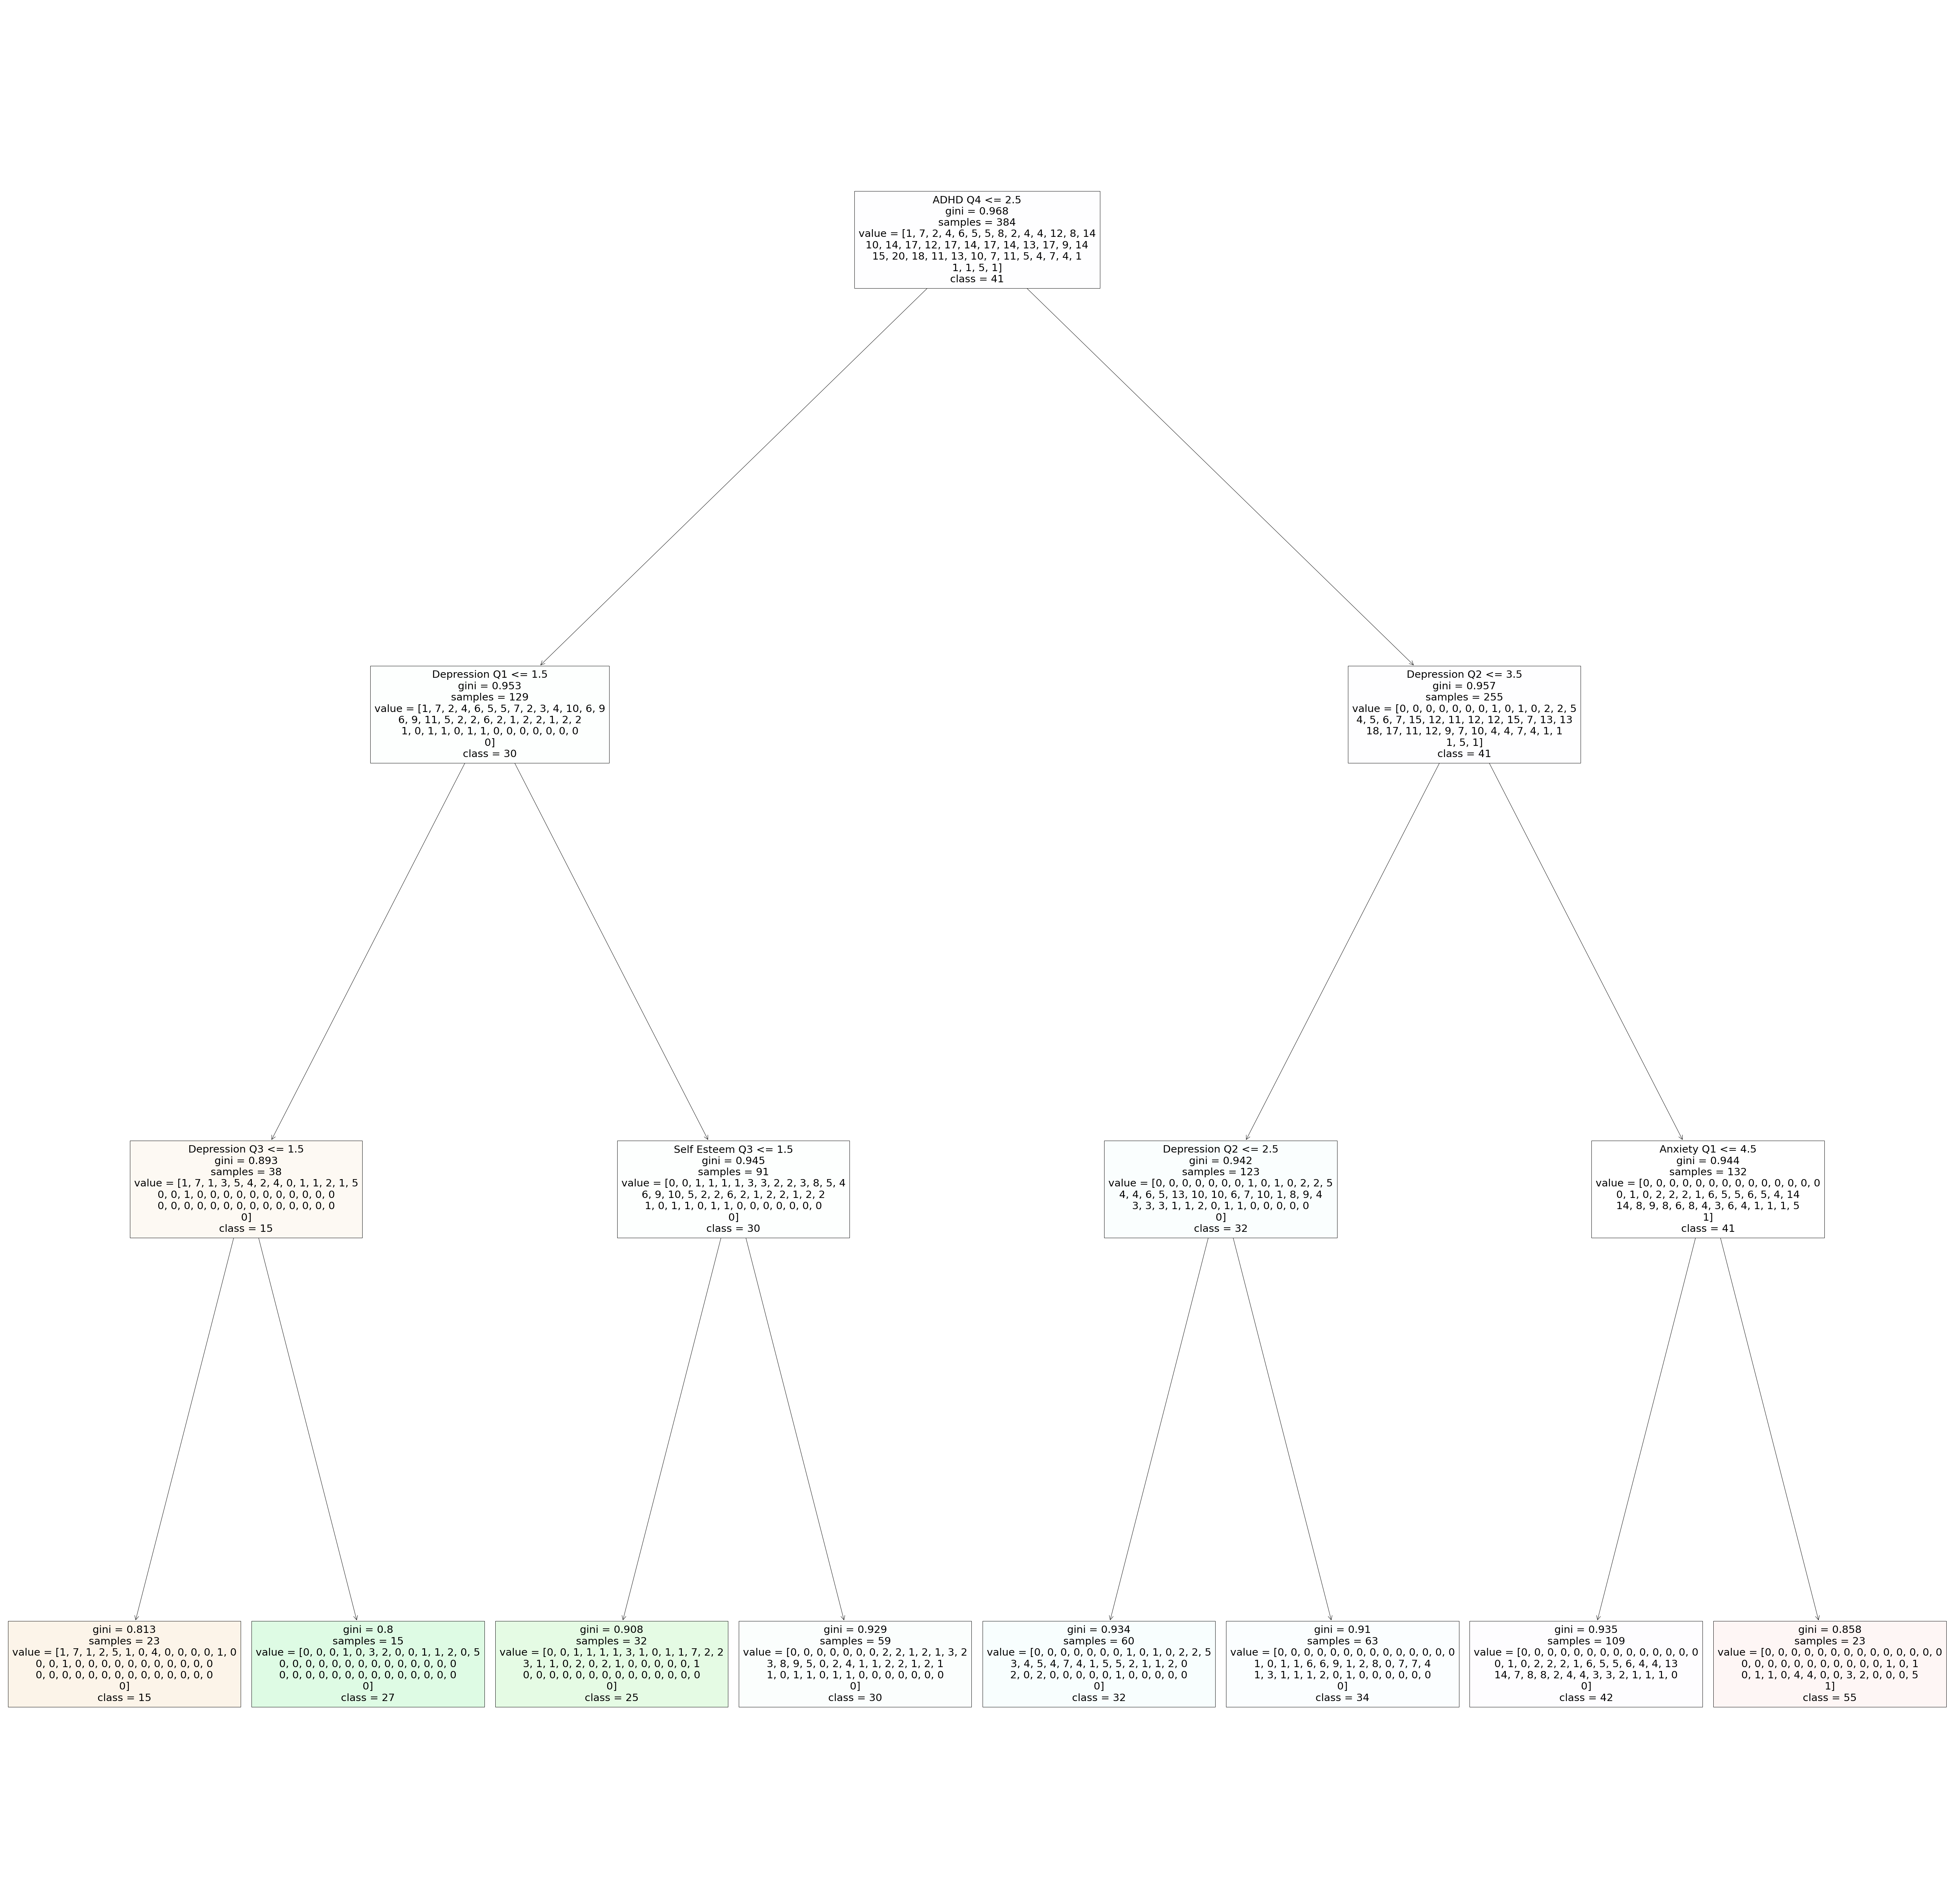

In [314]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,100))
plot_tree(best_estimator, filled=True, feature_names=X_train.columns, class_names=[str(x) for x in best_estimator.classes_])
plt.show()

# Conclusion

The main issue with this is the lack of training data. Although it is high quality, the decision tree could better fit the data with more instances.